In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#This is to define the model object, fit the model to the data and make predictions with the model.
#The model is: real GDP percapita growth rate (Y) = f(MRI) [ Y = aX + b + e (e = prediction error)]
#They are also calculated the mean squared error (MSE), the correlation coefficient and the Rsquared.
#It is used the predict function to calculate predicted values.
#VALIDATION: In order to quantify our model against new input values, we often split the data into training and testing data. 
#The model is then fit to the training data and scored by the test data. 
#Sklean pre-processing provides a library for automatically splitting up the data into training and testing.
#It is used the Durbin-Watson test for serial correlation (autocorrelation) test.
#It is shown the model fit by plotting the predicted values against the original data

#All this can be performed for each of the European economies: 23 countries
#Each country has around 40 years of data
#All dataset were provided by the International Monetary Fund
# https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/weoselagr.aspx

#Macroeconomic Result Index (MRI) is an Index developed by Jose Ignacio Diaz Rettali

#Analysis for 23 European economies based on the Macroeconomic Result Index (MRI)
# MRI = (real GDP rate / (inflation rate / unemployment rate)) * 1000
# In order to demonstrate the strong relationship between the MRI and real GDP percapita rate,
# it is calcualted the R-squared for these variables to each country, and it is also
# needed to show the distribution around the mean R-squared
#The R-squared is calculated between the MRI and the real GDP percapita rate

Data1 = "data1/austria.csv"
Data2 = "data1/belgium.csv"
Data3 = "data1/bulgaria.csv"
Data4 = "data1/croatia.csv"
Data5 = "data1/czechrep.csv"
Data6 = "data1/denmark.csv"
Data7 = "data1/finland.csv"
Data8 = "data1/france.csv"
Data9 = "data1/germany.csv"
Data10 = "data1/greece.csv"
Data11 = "data1/hungary.csv"
Data12 = "data1/iceland.csv"
Data13 = "data1/italy.csv"
Data14 = "data1/luxembourg.csv"
Data15 = "data1/netherland.csv"
Data16 = "data1/norway.csv"
Data17 = "data1/poland.csv"
Data18 = "data1/portugal.csv"
Data19 = "data1/romania.csv"
Data20 = "data1/spain.csv"
Data21 = "data1/sweden.csv"
Data22 = "data1/switzerland.csv"
Data23 = "data1/unitedkingdom.csv"

dataW1 = pd.read_csv(Data1)
dataW2 = pd.read_csv(Data2)
dataW3 = pd.read_csv(Data3)
dataW4 = pd.read_csv(Data4)
dataW5 = pd.read_csv(Data5)
dataW6 = pd.read_csv(Data6)
dataW7 = pd.read_csv(Data7)
dataW8 = pd.read_csv(Data8)
dataW9 = pd.read_csv(Data9)
dataW10 = pd.read_csv(Data10)
dataW11 = pd.read_csv(Data11)
dataW12 = pd.read_csv(Data12)
dataW13 = pd.read_csv(Data13)
dataW14 = pd.read_csv(Data14)
dataW15 = pd.read_csv(Data15)
dataW16 = pd.read_csv(Data16)
dataW17 = pd.read_csv(Data17)
dataW18 = pd.read_csv(Data18)
dataW19 = pd.read_csv(Data19)
dataW20 = pd.read_csv(Data20)
dataW21 = pd.read_csv(Data21)
dataW22 = pd.read_csv(Data22)
dataW23 = pd.read_csv(Data23)

countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechrep', 'Denmark', 'Finland', 'France', 'Germany',
             'Greece', 'Hungary', 'Iceland', 'Italy', 'Luxembourg', 'Netherland', 'Norway', 'Poland', 'Portugal',
            'Romania', 'Spain', 'Sweden', 'Switzerland', 'United  kingdom']
dfrs = pd.DataFrame(countries, columns = ["Countries"])

#dfrs


In [2]:
#calculating the Macroeconomic Result Index (MRI)
#The number in dataW## identify the country to analyze, examples: dataW1 = Austria or dataW23 = United Kingdom

dataT = dataW8

dataT['mri'] = (dataT["gdprate"] / (dataT["infrate"] + dataT["unemprate"])) * 1000
#print(dataT)

dataT.head()


,year,gdprate,infrate,unemprate,gdppcrate,mri
0,1980,1.809,13.057,6.349,1.334,93.218592
1,1981,1.069,13.333,7.438,0.513,51.465986
2,1982,2.505,11.978,8.069,1.927,124.956353
3,1983,1.241,9.460,7.383,0.657,73.680461
4,1984,1.514,7.674,8.458,1.061,93.850731


In [3]:
#Regression results for a simple linear regression

from sklearn import linear_model
import statsmodels.api as sm

x = dataT['mri']
y = dataT['gdppcrate']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdppcrate   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1053.
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           2.37e-30
Time:                        09:22:09   Log-Likelihood:                -17.428
No. Observations:                  42   AIC:                             38.86
Df Residuals:                      40   BIC:                             42.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2759      0.073     -3.773      0.001      -0.424      -0.128
mri            0.0105      0.000     32.449      0.000       0.010       0.011
==============================================================================
Omnibus:                        4.076   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.053
Skew:                           0.391   Prob(JB):                        0.217
Kurtosis:                       4.065   Cond. No.                         284.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Estimated line equation

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataT["mri"], dataT["gdppcrate"])
regressValues = dataT["mri"]* slope + intercept
lineEq = f"y = {round(slope, 5)} x + {round(intercept, 4)}   rvalue = {round(rvalue, 2)}  stderr = {round(stderr, 5)}"
print(lineEq)


y = 0.01054 x + -0.2759   rvalue = 0.98  stderr = 0.00032


In [5]:
#Predicted values and prediction errors

dfPAE = pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]
dfPAE.head()


,Predicted,Actual,Error
0,0.706902,1.334,-0.627098
1,0.266683,0.513,-0.246317
2,1.041529,1.927,-0.885471
3,0.500902,0.657,-0.156098
4,0.713567,1.061,-0.347433


In [ ]:
#export to excel

#pd.DataFrame(dfPAE).to_excel('mripredict.xlsx', index=False)


In [6]:
#Calculate predicted values
# N = 0 ; for the first year in dataset

N = 2

print(f"True output: {round(y[N], 4)}")
print(f"Predicted output: {round(predictions[N], 4)}")
print(f"Prediction Error: {round(predictions[N]-y[N], 4)}")


True output: 1.927
Predicted output: 1.0415
Prediction Error: -0.8855


In [7]:
# Score the prediction with mse and r2

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {round(mse, 4)}")
print(f"R-squared (R2 ): {round(r2, 4)}")


Mean Squared Error (MSE): 0.1343
R-squared (R2 ): 0.9634


In [8]:
#VALIDATION: In order to quantify our model against new input values, we often split the data into training and testing data. 
#The model is then fit to the training data and scored by the test data. 
#Sklearn pre-processing provides a library for automatically splitting up the data into training and testing

from sklearn.linear_model import LinearRegression

# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = dataT.mri.values.reshape(-1, 1)
y = dataT.gdppcrate.values.reshape(-1, 1)

print("Shape:", X.shape, y.shape)
#X
#y


Shape: (42, 1) (42, 1)


In [9]:
# Create a linear model

model = LinearRegression()


In [10]:
# Fit (Train) our model to the data

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [12]:
#Train the model using the training data

model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#And score the model using the unseen testing data

ScoreT = model.score(X_test, y_test)
print(f"Overall score (testing data) = {round(ScoreT, 4)}")


Overall score (testing data) = 0.9709


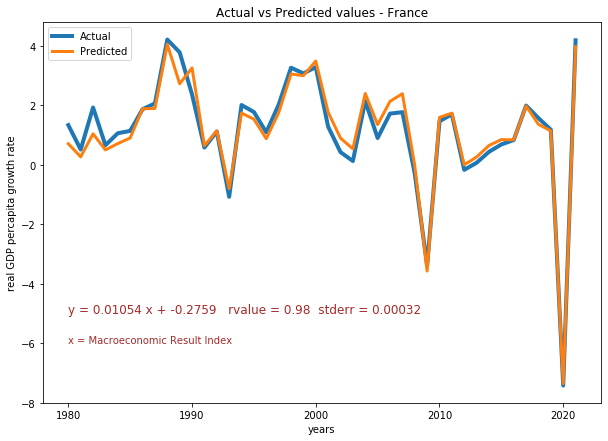

In [14]:
#This is to show the model fit by plotting the predicted values against the original data.

plt.figure(figsize = (10,7))

x1 = dataT['year']
y1 = dfPAE['Actual']
plt.plot(x1, y1, label = "Actual", linewidth = 4)
x2 = dataT['year']
y2 = dfPAE['Predicted']
plt.plot(x2, y2, label = "Predicted", linewidth = 3)
plt.xlabel('years')
plt.ylabel('real GDP percapita growth rate')
plt.title('Actual vs Predicted values - France')
plt.legend()
plt.annotate(lineEq,(1980,-5), color = "brown", fontsize=12)
plt.annotate('x = Macroeconomic Result Index',(1980,-6), color = "brown", fontsize=10)
plt.show()


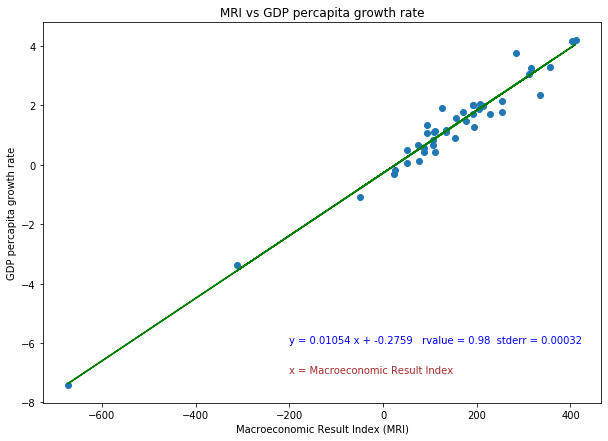

In [16]:
#This is to show the model fit by plotting the GDP percapita growth rate vs MRI using the estimated model.

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataT["mri"], dataT["gdppcrate"])
regressValues = dataT["mri"]* slope + intercept
lineEq = f"y = {round(slope, 5)} x + {round(intercept, 4)}   rvalue = {round(rvalue, 2)}  stderr = {round(stderr, 5)}"

plt.figure(figsize = (10,7))

plt.scatter(dataT["mri"], dataT["gdppcrate"])
plt.plot(dataT["mri"], regressValues, color = "green")
plt.annotate(lineEq,(-200,-6), color = "blue", fontsize=10)
plt.annotate('x = Macroeconomic Result Index',(-200,-7), color = "brown", fontsize=10)
plt.xlabel("Macroeconomic Result Index (MRI)")
plt.ylabel("GDP percapita growth rate")
plt.title("MRI vs GDP percapita growth rate")

plt.show()
